# **Sale Data Analyzing:**

## Importing Libraries:

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data and Merging:

In [3]:
#saving path to a variable:
path='./Sales_Data/'

#save files names:
files=(file for file in os.listdir(path) if file.endswith('.csv'))

#creating an empty data frame:
All_data=pd.DataFrame()

#read all files in a single data frame(prevents from  duplicate headers)
for i,file in enumerate(files):
  df=pd.read_csv(path+file)

  if i>0:
    df=df[1:]
    All_data=pd.concat([All_data,df])
  else:
    All_data=df

#save to new csv file
All_data.to_csv('All_data.csv',index=False)





## Reading from new file and Cleaning Data

In [4]:
df=pd.read_csv('All_data.csv')


### Dealing with NaN values:

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.dropna(how='all',inplace=True)

In [7]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### checking for duplicate values:

In [8]:
df.duplicated().sum()

618

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Add column for better analysis

### change columns names and remove space:

In [11]:
df.columns=df.columns.str.replace(' ','_')

### Change order Date to datetime

In [12]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [13]:
df=df[df['Order_Date'].str[:2]!='Or'] #we had some rows with string values

In [14]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

C:\Users\milad\AppData\Local\Temp\ipykernel_15608\1882151666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [15]:
df['Price_Each']=df['Price_Each'].astype('float')
df['Quantity_Ordered']=df['Quantity_Ordered'].astype('int')

In [16]:
#checktypes:
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [17]:
# Adding sales column:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']

In [18]:
#Adding Month Column:
df['Month']=df['Order_Date'].dt.month.astype('int')

In [19]:
#adding city:
df['City']=df['Purchase_Address'].str.split(',').str[1]
#adding State:
df['State']=df['Purchase_Address'].str.split(',').str[2].str.split().str[0]


In [164]:
df['Hours']=df['Order_Date'].dt.hour

In [165]:
display(df.dtypes)
df.head()


Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Sales                      float64
Month                        int32
City                        object
State                       object
Hours                        int32
dtype: object

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Month,City,State,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,9


## Analyzing Data:

### Sales per Month:

In [142]:
#SAles per month
result=df.groupby('Month').agg({'Sales':'sum'})
result


,Sales
Month,
1,1820713.16
2,2199378.08
3,2804273.35
4,3389217.98
5,3150604.24
6,2576268.20
7,2646311.32
8,2241059.39
9,2094450.33


C:\Users\milad\AppData\Local\Temp\ipykernel_15608\3660609946.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


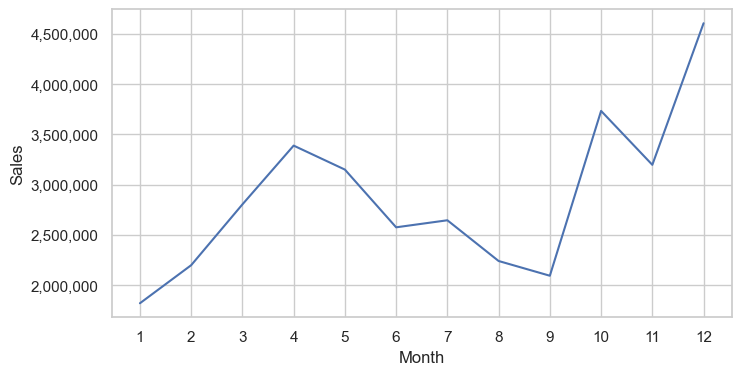

In [160]:
plt.figure(figsize=(8,4))
ax=sns.lineplot(x=result.index,y=result['Sales'])
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.xticks(result.index)
plt.show()


C:\Users\milad\AppData\Local\Temp\ipykernel_15608\290645274.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


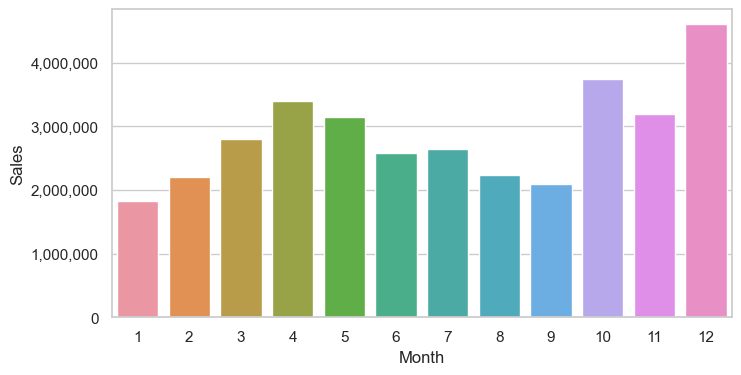

In [154]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x=result.index,y=result['Sales'])
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.show()


### Quntity ordered per Month:


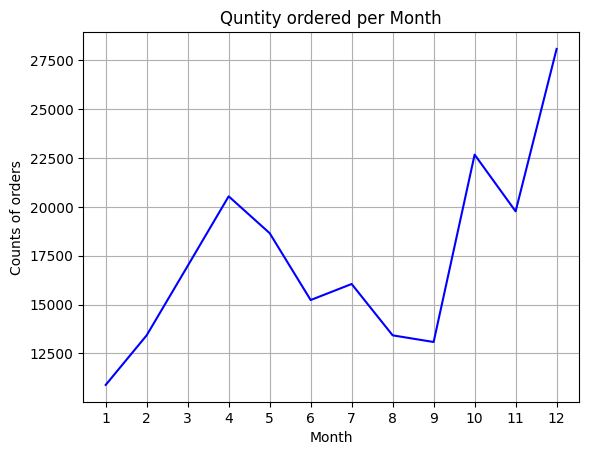

In [90]:
#Quantity ordered per month
result=df.groupby('Month').agg({'Quantity_Ordered':'sum'})
plt.title('Quntity ordered per Month')
plt.xlabel('Month')
plt.ylabel('Counts of orders')
plt.plot(result.index,result['Quantity_Ordered'],color='blue')
plt.xticks(result.index)
plt.grid(True)

# Scale 'Quantity_Ordered'

plt.show()


### Sales And Quantity per City:

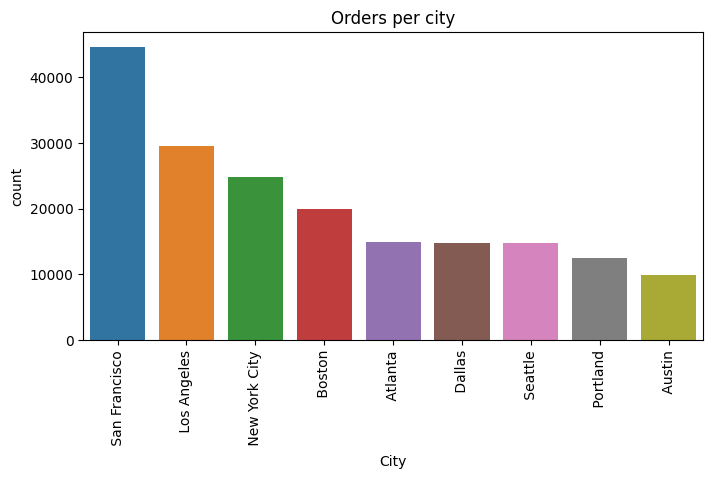

In [87]:
#Orders per city:
plt.figure(figsize=(8,4))
plt.title('Orders per city')
sns.countplot(data=df,x=df["City"],order=df['City'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [66]:
res2=df.groupby('City')['Sales'].sum()
res2


City
 Atlanta          2794049.07
 Austin           1817344.33
 Boston           3657927.65
 Dallas           2764993.97
 Los Angeles      5448288.92
 New York City    4660143.16
 Portland         2318619.99
 San Francisco    8254743.55
 Seattle          2745022.04
Name: Sales, dtype: float64

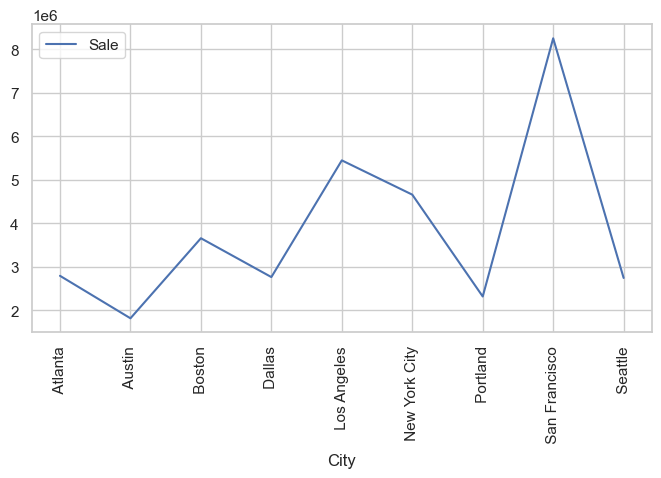

In [163]:
plt.figure(figsize=(8,4))

sns.lineplot(x=res2.index,y=res2.values,label='Sale')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Best Hours for Advertisement:

In [171]:
HoursSales=df.groupby('Hours')['Sales'].sum()
HoursSales

Hours
0      711848.66
1      459863.90
2      234839.45
3      145742.94
4      162546.07
5      230664.87
6      447963.01
7      744067.32
8     1192309.20
9     1638772.05
10    1942608.09
11    2296619.84
12    2314359.85
13    2152369.98
14    2082498.34
15    1940623.20
16    1902373.20
17    2126541.98
18    2218374.01
19    2411959.19
20    2280084.36
21    2040090.48
22    1606219.87
23    1177792.82
Name: Sales, dtype: float64

C:\Users\milad\AppData\Local\Temp\ipykernel_15608\3587129673.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


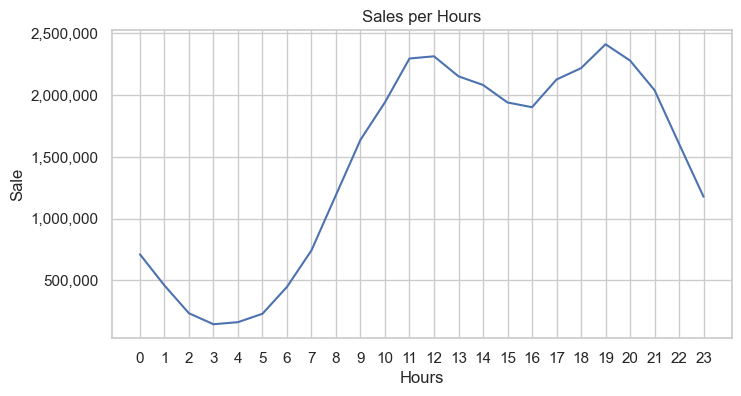

In [178]:
plt.figure(figsize=(8,4))
plt.title('Sales per Hours')
ax=sns.lineplot(x=HoursSales.index,y=HoursSales.values)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.xticks(HoursSales.index)
plt.ylabel('Sale')
plt.show()

### top 10 Products sold(Quantity & Sale):

In [181]:
df['Product'].value_counts()


Product
USB-C Charging Cable          21858
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20557
Wired Headphones              18846
Apple Airpods Headphones      15524
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6837
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6173
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4720
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

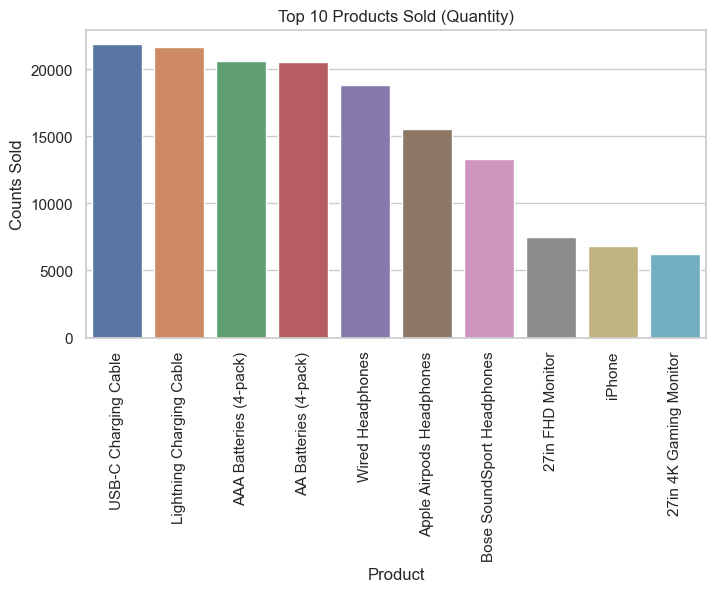

In [190]:
Top10p=plt.figure(figsize=(8,4))
sns.countplot(data=df,x=df['Product'],order=df['Product'].value_counts().sort_values(ascending=False).index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Products Sold (Quantity)')
plt.ylabel('Counts Sold')
plt.show()

C:\Users\milad\AppData\Local\Temp\ipykernel_15608\2486302099.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


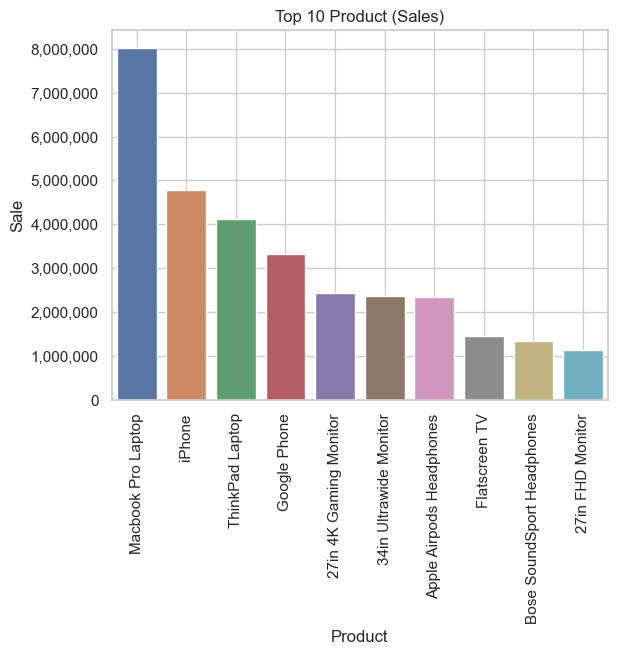

In [219]:
Top10Sold=df.groupby('Product')['Sales'].sum()
ax=sns.barplot(x=Top10Sold.index,y=Top10Sold.values,order=Top10Sold.sort_values(ascending=False).index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Product (Sales)')
plt.ylabel('Sale')
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.grid(True)
plt.show()